## Bài tập cuối kì: Dự báo sự tăng hoặc giảm cổ phiếu lúc đóng phiên vào hôm sau của facebook

### Vấn đề:
    Giải quyết bài toán dự đoán sự tăng hoặc giảm giá cổ phiếu của facebook trên tập dữ liệu dataset đã có như:
- Khai phá dữ liệu bao gồm hình thành và xây dựng các đặc trưng (feature) mới như các giá trị để tăng độ chính xác cho dự báo
- Hình thành đặc trưng để dự báo với sự tăng giá hay giảm của cổ phiếu Facebook
- Áp dụng các kĩ thuật chuẩn hóa dữ liệu (nếu cần có)
- Lựa chọn model logistic regression cho việc lựa chọn và đánh giá mô hình dự báo vì đơn vị xử lí là 0 và 1
- Phân chia tập dữ liệu train và test để đánh giá độ hiểu quả (Trong đó bao gồm có xử lí cross_validation)
- Đánh giá độ chính xác của dự đoán và tiếp cận các giải pháp để tăng độ chính xác của bài toán dự đoán

### Xây dựng và chuẩn bị dữ liệu 

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./FB_stock_history.csv')
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0,0
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0,0
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0,0
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,0,0
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,0,0
...,...,...,...,...,...,...,...,...
2354,2021-09-27,349.809998,355.149994,347.079987,353.579987,15205800,0,0
2355,2021-09-28,347.970001,349.600006,338.920013,340.649994,21710300,0,0
2356,2021-09-29,343.149994,345.230011,338.880005,339.609985,14452200,0,0
2357,2021-09-30,340.450012,342.799988,338.149994,339.390015,16547100,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2359 non-null   object 
 1   Open          2359 non-null   float64
 2   High          2359 non-null   float64
 3   Low           2359 non-null   float64
 4   Close         2359 non-null   float64
 5   Volume        2359 non-null   int64  
 6   Dividends     2359 non-null   int64  
 7   Stock Splits  2359 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 147.6+ KB


In [4]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2359.000000,2359.000000,2359.000000,2359.000000,2.359000e+03,2359.0,2359.0
mean,139.606969,141.234324,137.958605,139.656876,3.095630e+07,0.0,0.0
std,84.490691,85.465048,83.566847,84.565640,2.778137e+07,0.0,0.0
min,18.080000,18.270000,17.549999,17.730000,5.913100e+06,0.0,0.0
25%,74.935001,75.565002,74.020000,74.855000,1.564190e+07,0.0,0.0
50%,130.979996,132.259995,129.770004,131.050003,2.220590e+07,0.0,0.0
75%,184.914993,186.830002,183.419998,185.345001,3.597605e+07,0.0,0.0
max,381.679993,384.329987,378.809998,382.179993,5.735764e+08,0.0,0.0


**Loại bỏ một số thành phần không mong muốn**

In [5]:
data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

**Hiển thị đồ thị các biến trong datasets**

Text(0, 0.5, 'Khối lượng')

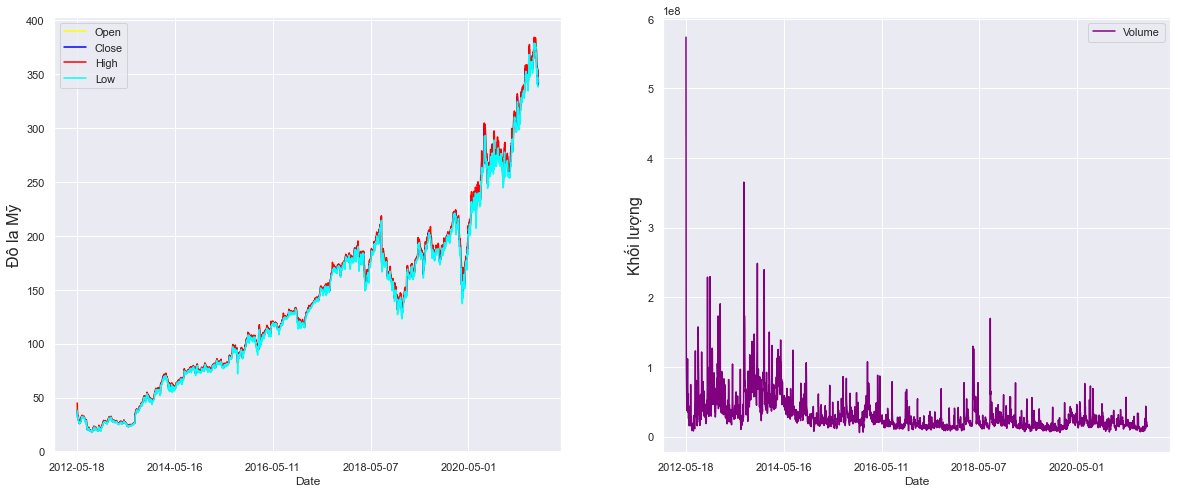

In [175]:
plt.figure(figsize=(20,8))
ax1 = plt.subplot(1, 2, 1)
data.plot.line(x='Date', y='Open', ax = ax1, color='yellow', label='Open')
data.plot.line(x='Date', y='Close', ax=ax1, color='blue', label='Close')
data.plot.line(x='Date', y='High', ax=ax1, color='red', label='High')
data.plot.line(x='Date', y='Low', ax=ax1, color='cyan', label='Low')
plt.ylabel('Đô la Mỹ', fontsize = 16)
ax2 = plt.subplot(1, 2, 2)
data.plot.line(x='Date', y='Volume', ax=ax2, color='purple', label='Volume')
plt.ylabel('Khối lượng', fontsize = 16)

    Nếu chỉ sử dụng bộ dataset cơ bản sẽ rất khó để dự đoán giá cổ phiếu vì sự chênh lệch giữa giá trị trong 1 phiên biến thiên rất rất mạnh như hình 1
    ==> Mà vì đây là dữ liệu được biểu hiện sự biến thiên của thời gian nên khó có thể nhận diện ra được loại phân bố trong từng giai đoạn vì biến thiên rất mạnh
    ==> Nên sẽ xây dựng thêm cho nó một số đặc trưng mới để nâng cao độ chính xác và thực hiện bài toán dự đoán sự tăng giảm giá cổ phiếu


---
### Xử lí dữ liệu cho bộ dataset 
**Tạo thêm các đặc trưng mới cho bộ dữ liệu**

***Giá trị tăng trưởng trong 1 phiên của cố phiếu***
- Giá trị sẽ là bằng 1 nếu giá mở cửa < giá đóng cửa của cổ phiếu
- Giá trị sẽ là bằng 0 nếu giá trị mở cửa > giá đóng cửa của cố phiếu

In [176]:
conditions = [(data['Open'] - data['Close']) < 0, (data['Open'] - data['Close']) > 0]
values = [1, 0]
data['PosSession'] = np.select(conditions, values, default = 1)
data.head()

,Date,Open,High,Low,Close,Volume,PosSession
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400,0
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700,0
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600,0
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000,1
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200,1


***Giá trị đóng cửa phiên so với phiên trước***
- Clone một cột Close để tạo ra một biến Actual_Close với giá trị là độ dịch giá đóng cửa đi một phiên (tức actual_close 18-5-2012 sẽ có giá trị 34.0299)
- Tạo thêm giá trị Target đây được xem là giá trị dùng để dự đoán cho bài toán dự đoán
- Giá trị sẽ nhận giá trị 0 nếu giá trị đóng phiên sau nhỏ hơn giá trị đóng phiên trước
- Giá trị sẽ nhận giá trị 1 nếu giă trị đóng phiên sau lớn hơn giá trị đóng phiên trước

In [177]:
newfeatures = pd.DataFrame(data["Close"])
newfeatures = newfeatures.rename(columns = {"Close": 'Actual_Close'})
newfeatures['Target'] = data.rolling(window=2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]
newfeatures.head()

,Actual_Close,Target
0,38.230000,NaN
1,34.029999,0.0
2,31.000000,0.0
3,32.000000,1.0
4,33.029999,1.0


***Gộp các đặc trưng lại để tạo dataset hoàn chỉnh***
- Dịch data lên một đơn vị để loại bỏ giá trị NaN đầu tiên 
- Gộp lại ta được dataset mới

In [178]:
data = data.shift(1)
data['Actual_Close'] = newfeatures['Actual_Close']
data['Target'] = newfeatures['Target']
data = data.iloc[1:]
data.head()

,Date,Open,High,Low,Close,Volume,PosSession,Actual_Close,Target
1,2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400.0,0.0,34.029999,0.0
2,2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700.0,0.0,31.000000,0.0
3,2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600.0,0.0,32.000000,1.0
4,2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000.0,1.0,33.029999,1.0
5,2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200.0,1.0,31.910000,0.0


***Thông tin mà đặc trưng ta muốn dự đoán có label Target***

In [179]:
data['Target'].value_counts()

1.0    1239
0.0    1119
Name: Target, dtype: int64

---

## Xây dựng mô hình để train bộ dữ liệu
- Bao gồm 2 phương pháp để chọn bộ tham số mặc định hoặc thực hiện để lựa chọn bộ tham số tối ưu cho mô hình

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import loguniform

    Các giá trị dùng để thực hiện việc dự doán tức (Predictors)

In [181]:
predictors = ['Open', 'High', 'Low', 'Close', 'Volume', 'PosSession']

    Thực hiện sử dụng bộ tham số mặc định (Với randomstate 0 - 9)

In [182]:
def logisticRegression(data):
    accuracy_score_arr = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(data[predictors], data['Target'], test_size=0.2, random_state=i)
        model = LogisticRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_score_arr.append(accuracy_score(y_test, y_pred))
    accuracy_score_arr = np.array(accuracy_score_arr)
    return accuracy_score_arr.mean()

print("Độ chính xác của thuật toán Logistic Regression: ", logisticRegression(data))


Độ chính xác của thuật toán Logistic Regression:  0.5294491525423728


    Sử dụng tham số để cấu hình cho mô hình Logictis Regression:
- Thực hiện train 10 lần để lấy bộ tham số tốt nhất cho mô hình Logistic 
- Kết quả sẽ là giá trị có số điểm tốt nhất ==> Ta chọn params đó làm tham số cho mô hình Logistic 

In [183]:
def selection_hyperparameters_model(data):
    params = []
    scores = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(data[predictors], data['Target'], test_size=0.2, random_state=i)
        model = LogisticRegression()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        space = dict()
        space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
        space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
        space['C'] = loguniform(1e-5, 100)
        search = RandomizedSearchCV(model, space, cv=cv, scoring='accuracy', n_iter=100, n_jobs=-1, random_state=1)
        result = search.fit(X_train, y_train)
        params.append(result.best_params_)
        scores.append(result.best_score_)
    return params, scores
        
best_params_,best_score= selection_hyperparameters_model(data=data)

In [184]:
dataframe = {'params': best_params_, 'scores': best_score}
paramsdf = pd.DataFrame(dataframe)
paramsdf

,params,scores
0,"{'C': 0.004556412214150533, 'penalty': 'l2', '...",0.527921
1,"{'C': 0.008301451461243866, 'penalty': 'none',...",0.524221
2,"{'C': 2.282420876921599, 'penalty': 'l2', 'sol...",0.525101
3,"{'C': 2.282420876921599, 'penalty': 'l2', 'sol...",0.529691
4,"{'C': 3.849116286235326e-05, 'penalty': 'l2', ...",0.533930
5,"{'C': 0.00010648568665651115, 'penalty': 'none...",0.520151
6,"{'C': 0.00010648568665651115, 'penalty': 'none...",0.527570
7,"{'C': 1.7345993459584347e-05, 'penalty': 'l2',...",0.525464
8,"{'C': 1.0513352083086982, 'penalty': 'l2', 'so...",0.524187
9,"{'C': 0.008301451461243866, 'penalty': 'none',...",0.528638


    Sử dụng cross_validation để chọn tập parameter tốt nhất cho bài toán dự đoán

In [185]:
def rating_model(data, best_params_):
    fit_time = []
    test_score = []
    train_score = []
    score_time = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(data[predictors], data['Target'], test_size=0.2, random_state=i)
        model = LogisticRegression(C = best_params_[i]['C'], penalty = best_params_[i]['penalty'], solver = best_params_[i]['solver'])
        result = cross_validate(model, X_train, y_train, cv=10, scoring='accuracy', return_train_score=True)
        fit_time.append(result['fit_time'].mean())
        test_score.append(result['test_score'].mean())
        train_score.append(result['train_score'].mean())
        score_time.append(result['score_time'].mean())
    return fit_time, test_score, train_score, score_time

fit_time, test_score, train_score, score_time = rating_model(data, best_params_)

dataframe = {'fit_time': fit_time, 'test_score': test_score, 'train_score': train_score, 'score_time': score_time}
df = pd.DataFrame(dataframe)
df["iteration"] = np.arange(10)
df

,fit_time,test_score,train_score,score_time,iteration
0,0.449542,0.519636,0.533050,0.001401,0
1,0.440574,0.514840,0.527041,0.001303,1
2,0.492909,0.516439,0.532756,0.001100,2
3,0.489254,0.540319,0.540827,0.001202,3
4,0.236898,0.533401,0.533404,0.001003,4
5,0.007400,0.520151,0.520148,0.001001,5
6,0.007199,0.527570,0.527572,0.001102,6
7,0.182837,0.515375,0.524685,0.001200,7
8,0.377297,0.506878,0.529398,0.001302,8
9,0.441099,0.527592,0.541593,0.001101,9


Text(0.5, 0.98, 'Đánh giá thuật toán Logistic Regression')

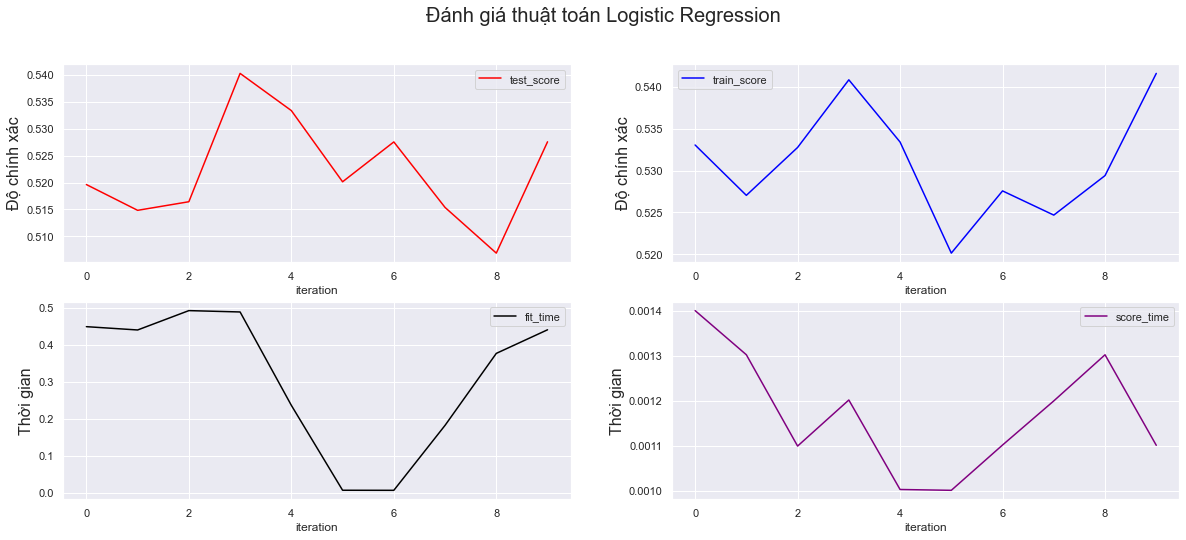

In [186]:
plt.figure(figsize=(20,8))
ax1 = plt.subplot(2, 2, 1)
df.plot.line(x='iteration', y='test_score', ax = ax1, color='red', label='test_score')
plt.ylabel('Độ chính xác', fontsize = 16)
ax2 = plt.subplot(2, 2, 2)
df.plot.line(x='iteration', y='train_score', ax = ax2, color='blue', label='train_score')
plt.ylabel('Độ chính xác', fontsize = 16)
ax3 = plt.subplot(2, 2, 3)
df.plot.line(x='iteration', y='fit_time', ax=ax3, color='black', label='fit_time')
plt.ylabel('Thời gian', fontsize = 16)
ax4 = plt.subplot(2, 2, 4)
df.plot.line(x='iteration', y='score_time', ax=ax4, color='purple', label='score_time')
plt.ylabel('Thời gian', fontsize = 16)
plt.suptitle('Đánh giá thuật toán Logistic Regression', fontsize = 20)

### Nhìn vào đồ thị ta có thể thấy bộ tham số ở vòng lặp 3 và vòng lặp 9 cho giá trị khá tốt ==> Để có thể chọn lựa

    Lựa chọn bộ tham số phù hợp cho bài toán dự đoán
- Ta sẽ đánh giá bằng một ma trận bằng việc ta sẽ xếp thứ tự của 3 giá trị tốt nhất để từ đó lựa ra bộ tham số tốt nhất 

***Sắp xếp giá trị lại để dễ xếp hạng***
- Giá trị thời gian thì xếp theo từ nhỏ đến lớn
- Giá trị độ chính xác thì xếp theo từ lớn đến nhỏ

In [187]:
fit_time_asc = df['fit_time'].sort_values(ascending=True)
score_time_asc = df['score_time'].sort_values(ascending=True)
test_score_desc = df['test_score'].sort_values(ascending=False)
train_score_desc = df['train_score'].sort_values(ascending=False) 

In [188]:
dataframe = {'Xếp hạng': ['Thứ 1', 'Thứ 2', 'Thứ 3'],
            'fit_time' : [df.loc[df['fit_time'] == fit_time_asc.iloc[0], 'iteration'].item(), df.loc[df['fit_time'] == fit_time_asc.iloc[1], 'iteration'].item(), df.loc[df['fit_time'] == fit_time_asc.iloc[2], 'iteration'].item()],
            'score_time' : [df.loc[df['score_time'] == score_time_asc.iloc[0], 'iteration'].item(), df.loc[df['score_time'] == score_time_asc.iloc[1], 'iteration'].item(), df.loc[df['score_time'] == score_time_asc.iloc[2], 'iteration'].item()],
            'test_score' : [df.loc[df['test_score'] == test_score_desc.iloc[0], 'iteration'].item(), df.loc[df['test_score'] == test_score_desc.iloc[1], 'iteration'].item(), df.loc[df['test_score'] == test_score_desc.iloc[2], 'iteration'].item()],
            'train_score' : [df.loc[df['train_score'] == train_score_desc.iloc[0], 'iteration'].item(), df.loc[df['train_score'] == train_score_desc.iloc[1], 'iteration'].item(), df.loc[df['train_score'] == train_score_desc.iloc[2], 'iteration'].item()]}
df = pd.DataFrame(dataframe)
df


,Xếp hạng,fit_time,score_time,test_score,train_score
0,Thứ 1,6,5,3,9
1,Thứ 2,5,4,4,3
2,Thứ 3,7,2,9,4


### <font color = "cyan">Nhìn bảng trên ta có thể thấy thứ tự giá trị về điểm train của mô hình với 3 và 9 và cho accuracy cao hơn (Ưu tiên giải quyết bài toán accuracy)</font>
- Ta sẽ so sánh score trong việc train mô hình và giá cross_validate để đưa ra bộ tham số tốt nhất 

In [189]:
print('Tham số đối iteration 3 và điểm đánh giá: ', best_params_[3], "và", best_score[3])
print('Tham số đối iteration 9 và điểm đánh giá: ', best_params_[9], "và", best_score[9])

Tham số đối iteration 3 và điểm đánh giá:  {'C': 2.282420876921599, 'penalty': 'l2', 'solver': 'newton-cg'} và 0.529690607527487
Tham số đối iteration 9 và điểm đánh giá:  {'C': 0.008301451461243866, 'penalty': 'none', 'solver': 'newton-cg'} và 0.5286380351983188


- Ta chọn bộ tham số của vòng lặp 3 hoặc 9 vì cho được độ lớn cả về train và test score ==> Đây là bộ giá trị tốt nhât sau đó áp dụng và retrain model
- Không chọn 4 với độ chính xác trong vòng lặp là 53% nhưng kết quả test score và train score đều thấp hơn và điểm đánh giá không quá chênh lệch

In [190]:
best_param_logistic = best_params_[df['train_score'].iloc[0]]

In [191]:
def logisticRegressionWithHyperparameter(data, params):
    accuracy_score_arr = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(data[predictors], data['Target'], test_size=0.2, random_state=i)
        model = LogisticRegression(C = params['C'], solver = params['solver'], penalty = params['penalty'])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_score_arr.append(accuracy_score(y_test, y_pred))
    accuracy_score_arr = np.array(accuracy_score_arr)
    return accuracy_score_arr.mean()

print("Độ chính xác của thuật toán Logistic Regression với cấu hình siêu tham số:  ", logisticRegressionWithHyperparameter(data, best_param_logistic))

Độ chính xác của thuật toán Logistic Regression với cấu hình siêu tham số:   0.5313559322033898


### So sánh độ chính xác khi không và có sử dụng giá trị siêu thảm số đã tìm


In [192]:
print("Độ sai lệch trong bộ tính toán giữa 2 cách: ", (logisticRegressionWithHyperparameter(data, best_param_logistic) - logisticRegression(data)) * 100,"%")

Độ sai lệch trong bộ tính toán giữa 2 cách:  0.1906779661017044 %


### ***<font color = "yellow"> Cấu hình siêu tham số của bài toán logisticRegression sẽ cho độ dự đoán mạnh hơn 0.16-0.19% ==> Chọn cấu hình config hyperparams</font>***

---

## Xem thử điểm dự đoán của 2 mô hình trong bài toán sẽ như thế nào ? Đây là cùng một trưởng dữ liệu với randomstate = 1

In [214]:
def drawPredict(data):
    X_train, X_test, y_train, y_test = train_test_split(data[predictors], data['Target'], test_size=0.2, random_state=1)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = pd.Series(y_pred, index = X_test.index)
    combined = pd.concat({"Target": y_test, "Predicted": y_pred}, axis=1)
    print(combined.describe())
    print(combined.value_counts())
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    index = np.arange(0, 50)
    clone_combine = combined.head(50).set_index(index)
    print("-----------------------------------------------------------------------------")

def drawPredictwithHyperparameter(data, params):
    X_train, X_test, y_train, y_test = train_test_split(data[predictors], data['Target'], test_size=0.2, random_state=1)
    model = LogisticRegression(C = params['C'], solver = params['solver'], penalty = params['penalty'])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = pd.Series(y_pred, index = X_test.index)
    combined = pd.concat({"Target": y_test, "Predicted": y_pred}, axis=1)
    print(combined.describe())
    print(combined.value_counts())
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))

drawPredict(data)
drawPredictwithHyperparameter(data, best_param_logistic)

           Target  Predicted
count  472.000000      472.0
mean     0.536017        1.0
std      0.499230        0.0
min      0.000000        1.0
25%      0.000000        1.0
50%      1.000000        1.0
75%      1.000000        1.0
max      1.000000        1.0
Target  Predicted
1.0     1.0          253
0.0     1.0          219
dtype: int64
Accuracy Score:  0.5360169491525424
-----------------------------------------------------------------------------
           Target   Predicted
count  472.000000  472.000000
mean     0.536017    0.826271
std      0.499230    0.379278
min      0.000000    0.000000
25%      0.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000
Target  Predicted
1.0     1.0          217
0.0     1.0          173
        0.0           46
1.0     0.0           36
dtype: int64
Accuracy Score:  0.5572033898305084


- Siêu tham số giúp cho bài toán dự đoán trở nên chính xác hơn
- Đối chiếu với dữ liệu thì ta có thể thấy TH không cấu hình tham số ==> Luôn detect 1 và không detect 0 ==> Bộ tham số mặc định không nhạy dữ liệu
- Ngược lại bộ tham số hoạt động khá tốt khi có thể dự đoán được cả 0 và 1 ==> bộ tham số mới nhạy hơn dữ liệu hơn

---

### Cải thiện độ chính xác 

***Tạo biến mới***

    Rolling means
- Đại lượng thích hợp để giúp dự đoán được giá ở thời điểm hiện tại thông qua giá trị trung bình tuần, quý và năm
- Nếu giá hiện tại cao hơn giá thực sự thi có thể stock đang trên một đà tăng trưởng ==> Đây chính là rolling means


In [194]:
weekly_mean = data.rolling(window=7).mean()['Close']
quarterly_mean = data.rolling(window=90).mean()['Close']
annual_mean = data.rolling(window=365).mean()['Close']

In [195]:
data['weekly_mean'] = weekly_mean / data['Close']
data['quarterly_mean'] = quarterly_mean / data['Close']
data['annual_mean'] = annual_mean / data['Close']

- Thêm các giá trị là tỉ số liên hệ giữa các rolling means với nhau

In [196]:
data['annual_weekly_mean'] = data['annual_mean'] / data['weekly_mean']
data['annual_quarterly_mean'] = data['annual_mean'] / data['quarterly_mean']

    Ratio giữa các đối tượng giá 
- Tức là tính tổ hợp tỉ số về giá cửa cổ phiếu

In [197]:
data['open_close_ratio'] = data['Open'] / data['Close']
data['high_close_ratio'] = data['High'] / data['Close']
data['low_close_ratio'] = data['Low'] / data['Close']

## Sau khi thêm ta được dữ liệu mới 

In [198]:
data.head(10)

,Date,Open,High,Low,Close,Volume,PosSession,Actual_Close,Target,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,open_close_ratio,high_close_ratio,low_close_ratio
1,2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400.0,0.0,34.029999,0.0,NaN,NaN,NaN,NaN,NaN,1.099922,1.177086,0.993984
2,2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700.0,0.0,31.000000,0.0,NaN,NaN,NaN,NaN,NaN,1.073465,1.077285,0.969733
3,2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600.0,0.0,32.000000,1.0,NaN,NaN,NaN,NaN,NaN,1.051936,1.083548,0.998065
4,2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000.0,1.0,33.029999,1.0,NaN,NaN,NaN,NaN,NaN,0.980313,1.015625,0.980000
5,2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200.0,1.0,31.910000,0.0,NaN,NaN,NaN,NaN,NaN,0.997578,1.005450,0.961853
6,2012-05-25,32.900002,32.950001,31.110001,31.910000,37149800.0,0.0,28.840000,0.0,NaN,NaN,NaN,NaN,NaN,1.031025,1.032592,0.974930
7,2012-05-29,31.480000,31.690001,28.650000,28.840000,78063400.0,0.0,28.190001,0.0,1.134535,NaN,NaN,NaN,NaN,1.091540,1.098821,0.993412
8,2012-05-30,28.700001,29.549999,27.860001,28.190001,57267900.0,0.0,29.600000,1.0,1.109816,NaN,NaN,NaN,NaN,1.018092,1.048244,0.988294
9,2012-05-31,28.549999,29.670000,26.830000,29.600000,111639200.0,1.0,27.719999,0.0,1.035569,NaN,NaN,NaN,NaN,0.964527,1.002365,0.906419
10,2012-06-01,28.889999,29.150000,27.389999,27.719999,41855500.0,0.0,26.900000,0.0,1.088899,NaN,NaN,NaN,NaN,1.042208,1.051587,0.988095


Text(0.5, 1.0, 'Biểu đồ thể hiện tỉ lệ giữa các giá trị mở, cao, thấp với giá trị đóng cửa của ngày')

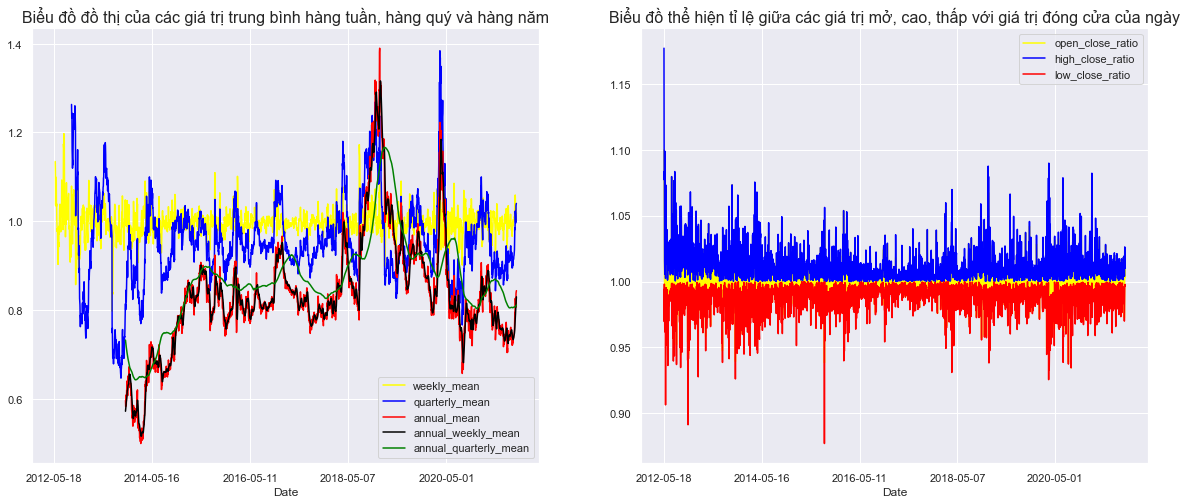

In [199]:
plt.figure(figsize=(20,8))
ax1 = plt.subplot(1, 2, 1)
data.plot.line(x='Date', y='weekly_mean', ax = ax1, color='yellow', label='weekly_mean')
data.plot.line(x='Date', y='quarterly_mean',ax = ax1, color='blue', label='quarterly_mean')
data.plot.line(x='Date', y='annual_mean',ax = ax1, color='red', label='annual_mean')
data.plot.line(x='Date', y='annual_weekly_mean',ax = ax1, color='black', label='annual_weekly_mean')
data.plot.line(x='Date', y='annual_quarterly_mean',ax = ax1, color='green', label='annual_quarterly_mean')
plt.title("Biểu đồ đồ thị của các giá trị trung bình hàng tuần, hàng quý và hàng năm", fontsize=16)
ax2 = plt.subplot(1, 2, 2)
data.plot.line(x='Date', y='open_close_ratio',ax = ax2, color='yellow', label='open_close_ratio')
data.plot.line(x='Date', y='high_close_ratio',ax = ax2, color='blue', label='high_close_ratio')
data.plot.line(x='Date', y='low_close_ratio',ax = ax2, color='red', label='low_close_ratio')
plt.title("Biểu đồ thể hiện tỉ lệ giữa các giá trị mở, cao, thấp với giá trị đóng cửa của ngày", fontsize=16)

- Sau khi thêm xong ta thấy dữ liệu trống tương đôi nhiều việc tiếp theo ta cần phải lựa chọn phương pháp để lắp đầy chỗ trống 
- Lựa chon random sample để có thể giữ được độ chính xác của dữ liệu mà tránh làm dữ liệu bị mất đi những đặc trưng 


In [200]:
def random_sample(columname):
    random_samples = data[columname].dropna().sample(n=data[columname].isnull().sum(),random_state=0)
    random_samples.index = data[data[columname].isnull()].index
    data[columname].update(random_samples) 

In [201]:
random_sample('weekly_mean')
random_sample('quarterly_mean')
random_sample('annual_mean')
random_sample('annual_weekly_mean')
random_sample('annual_quarterly_mean')

- Data sau khi được fill NaN ta được dữ liệu mới

In [202]:
data.head(10)

,Date,Open,High,Low,Close,Volume,PosSession,Actual_Close,Target,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,open_close_ratio,high_close_ratio,low_close_ratio
1,2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400.0,0.0,34.029999,0.0,0.979836,0.950293,0.809436,0.813995,0.808680,1.099922,1.177086,0.993984
2,2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700.0,0.0,31.000000,0.0,1.003945,1.155860,1.161306,1.179743,1.158646,1.073465,1.077285,0.969733
3,2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600.0,0.0,32.000000,1.0,1.029871,0.995428,0.781974,0.781656,0.845193,1.051936,1.083548,0.998065
4,2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000.0,1.0,33.029999,1.0,0.990031,1.063694,0.686415,0.644934,0.649804,0.980313,1.015625,0.980000
5,2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200.0,1.0,31.910000,0.0,0.998488,0.944620,0.810674,0.831396,0.904741,0.997578,1.005450,0.961853
6,2012-05-25,32.900002,32.950001,31.110001,31.910000,37149800.0,0.0,28.840000,0.0,0.989072,0.938410,0.808538,0.807889,0.854904,1.031025,1.032592,0.974930
7,2012-05-29,31.480000,31.690001,28.650000,28.840000,78063400.0,0.0,28.190001,0.0,1.134535,0.958489,0.735308,0.726377,0.809769,1.091540,1.098821,0.993412
8,2012-05-30,28.700001,29.549999,27.860001,28.190001,57267900.0,0.0,29.600000,1.0,1.109816,0.978545,0.828303,0.818625,0.863076,1.018092,1.048244,0.988294
9,2012-05-31,28.549999,29.670000,26.830000,29.600000,111639200.0,1.0,27.719999,0.0,1.035569,1.163261,0.954550,0.930010,0.922335,0.964527,1.002365,0.906419
10,2012-06-01,28.889999,29.150000,27.389999,27.719999,41855500.0,0.0,26.900000,0.0,1.088899,0.943454,0.671972,0.647933,0.678571,1.042208,1.051587,0.988095


- Đồ thị các đường sau khi đã update NaN

Text(0.5, 1.0, 'Độ thị biểu diễn các đường trung bình theo ngày quý năm trong data và thêm vào các giá trị trống')

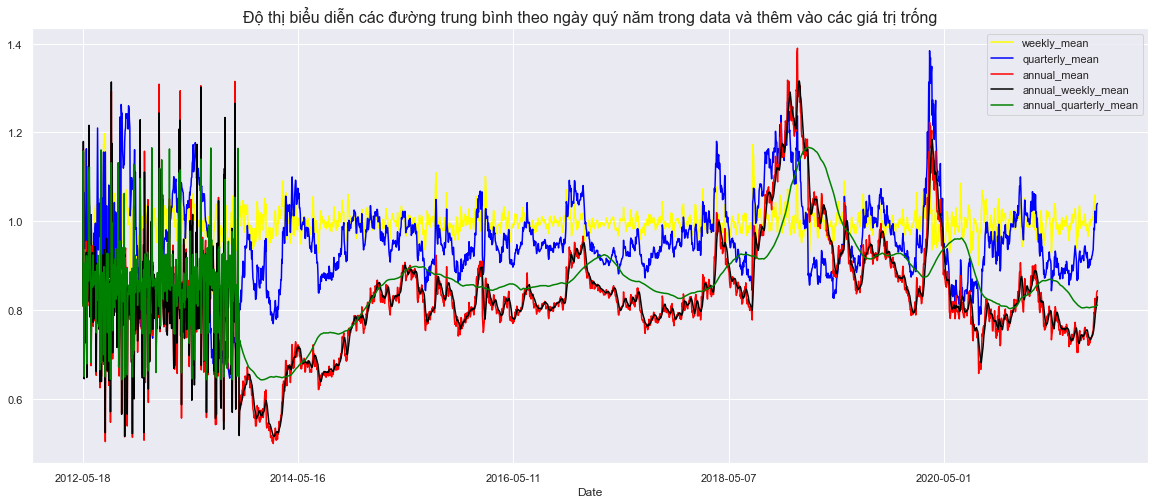

In [203]:
plt.figure(figsize=(20,8))
ax1 = plt.subplot(1, 1, 1)
data.plot.line(x='Date', y='weekly_mean', ax = ax1, color='yellow', label='weekly_mean')
data.plot.line(x='Date', y='quarterly_mean',ax = ax1, color='blue', label='quarterly_mean')
data.plot.line(x='Date', y='annual_mean',ax = ax1, color='red', label='annual_mean')
data.plot.line(x='Date', y='annual_weekly_mean',ax = ax1, color='black', label='annual_weekly_mean')
data.plot.line(x='Date', y='annual_quarterly_mean',ax = ax1, color='green', label='annual_quarterly_mean')
plt.title("Độ thị biểu diễn các đường trung bình theo ngày quý năm trong data và thêm vào các giá trị trống", fontsize=16)

    Thử nghiệm bỏ đi giá trị NaN và xem kết quả 

In [204]:
data_clone = data.iloc[365:]
data_clone

,Date,Open,High,Low,Close,Volume,PosSession,Actual_Close,Target,weekly_mean,quarterly_mean,annual_mean,annual_weekly_mean,annual_quarterly_mean,open_close_ratio,high_close_ratio,low_close_ratio
366,2013-10-31,47.160000,52.000000,46.500000,50.209999,248809000.0,1.0,49.750000,0.0,1.010470,0.800465,0.582529,0.576493,0.727738,0.939255,1.035650,0.926110
367,2013-11-01,50.849998,52.090000,49.720001,49.750000,95033000.0,0.0,48.220001,0.0,1.013640,0.813581,0.588781,0.580858,0.723690,1.022111,1.047035,0.999397
368,2013-11-04,49.369999,49.750000,48.020000,48.220001,80371000.0,0.0,50.110001,1.0,1.033270,0.844825,0.608441,0.588850,0.720198,1.023849,1.031730,0.995852
369,2013-11-05,47.790001,50.180000,47.509998,50.110001,76835000.0,1.0,49.119999,0.0,0.989053,0.818555,0.586482,0.592974,0.716485,0.953702,1.001397,0.948114
370,2013-11-06,50.259998,50.450001,48.709999,49.119999,67889000.0,0.0,47.560001,0.0,1.005759,0.840552,0.599200,0.595769,0.712866,1.023208,1.027077,0.991653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354,2021-09-24,343.239990,354.350006,342.369995,352.959991,18801900.0,1.0,353.579987,1.0,1.009054,0.996925,0.805943,0.798712,0.808429,0.972461,1.003938,0.969997
2355,2021-09-27,349.809998,355.149994,347.079987,353.579987,15205800.0,1.0,340.649994,0.0,0.999414,0.996434,0.805904,0.806377,0.808788,0.989338,1.004440,0.981617
2356,2021-09-28,347.970001,349.600006,338.920013,340.649994,21710300.0,0.0,339.609985,0.0,1.027255,1.034974,0.837792,0.815564,0.809481,1.021488,1.026273,0.994922
2357,2021-09-29,343.149994,345.230011,338.880005,339.609985,14452200.0,0.0,339.390015,0.0,1.023632,1.038909,0.841659,0.822228,0.810138,1.010424,1.016548,0.997851


- Vẽ đồ thị biểu diễn các đường sau khi đã xóa giá trị NaN

Text(0.5, 1.0, 'Độ thị biểu diễn các đường trung bình theo ngày quý năm trong data và lược bỏ đi 365 giá trị đầu')

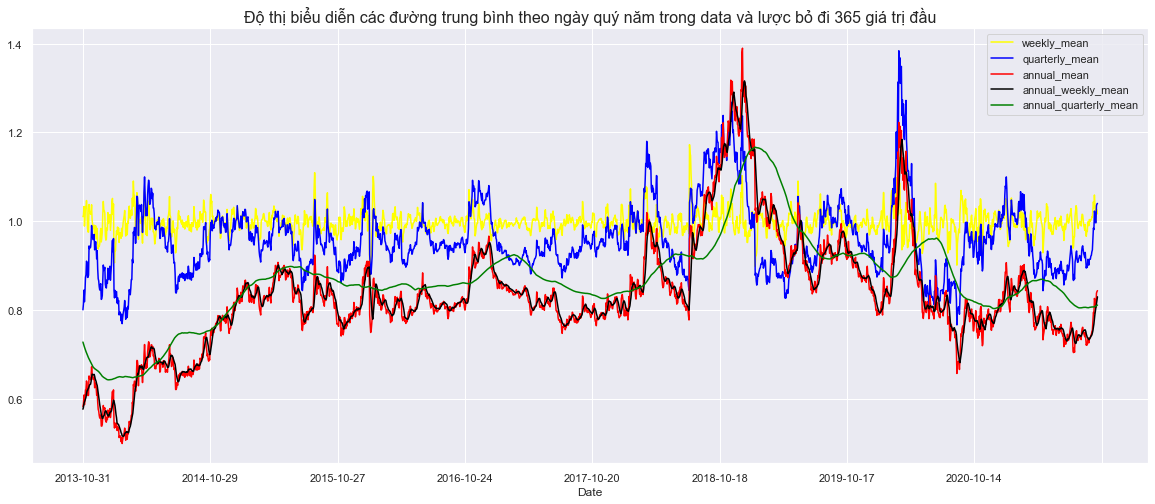

In [205]:
plt.figure(figsize=(20,8))
ax1 = plt.subplot(1, 1, 1)
data_clone.plot.line(x='Date', y='weekly_mean', ax = ax1, color='yellow', label='weekly_mean')
data_clone.plot.line(x='Date', y='quarterly_mean',ax = ax1, color='blue', label='quarterly_mean')
data_clone.plot.line(x='Date', y='annual_mean',ax = ax1, color='red', label='annual_mean')
data_clone.plot.line(x='Date', y='annual_weekly_mean',ax = ax1, color='black', label='annual_weekly_mean')
data_clone.plot.line(x='Date', y='annual_quarterly_mean',ax = ax1, color='green', label='annual_quarterly_mean')
plt.title("Độ thị biểu diễn các đường trung bình theo ngày quý năm trong data và lược bỏ đi 365 giá trị đầu", fontsize=16)

- Áp dụng dữ liệu mới vào để dự đoán 

In [206]:
full_predictors = predictors + ['weekly_mean', 'quarterly_mean', 'annual_mean', 'annual_weekly_mean', 'annual_quarterly_mean', 'open_close_ratio', 'high_close_ratio', 'low_close_ratio']
full_predictors

['Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'PosSession',
 'weekly_mean',
 'quarterly_mean',
 'annual_mean',
 'annual_weekly_mean',
 'annual_quarterly_mean',
 'open_close_ratio',
 'high_close_ratio',
 'low_close_ratio']

In [207]:
def lRWithHyperparameter_addingParams(data, params):
    accuracy_score_arr = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(data[full_predictors], data['Target'], test_size=0.2, random_state=i)
        model = LogisticRegression(C = params['C'], solver = params['solver'], penalty = params['penalty'])
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_score_arr.append(accuracy_score(y_test, y_pred))
    accuracy_score_arr = np.array(accuracy_score_arr)
    return accuracy_score_arr.mean()

print("Độ chính xác của thuật toán Logistic Regression với cấu hình siêu tham số và thêm đặc trưng mới và xử lí kí tự trống:  ", lRWithHyperparameter_addingParams(data, best_param_logistic))
print("Độ chính xác của thuật toán Logistic Regression với cấu hình siêu tham số và thêm đặc trưng mới và loại bỏ NaN:  ", lRWithHyperparameter_addingParams(data_clone, best_param_logistic))


Độ chính xác của thuật toán Logistic Regression với cấu hình siêu tham số và thêm đặc trưng mới và xử lí kí tự trống:   0.5430084745762711
Độ chính xác của thuật toán Logistic Regression với cấu hình siêu tham số và thêm đặc trưng mới và loại bỏ NaN:   0.5413533834586466


In [208]:
print("Độ chênh lệch giá trị của dữ liệu được thêm mới và cấu hình model đã xử lí kí tự trống so với dữ liệu cũ chưa thêm và có cấu hình model: ", (lRWithHyperparameter_addingParams(data, best_param_logistic) - logisticRegressionWithHyperparameter(data, best_param_logistic))*100, "%")
print("Độ chênh lệch giá trị của dữ liệu được thêm mới và cấu hình model đã loại bỏ NaN so với dữ liệu cũ chưa thêm và có cấu hình model: ", (lRWithHyperparameter_addingParams(data_clone, best_param_logistic) - logisticRegressionWithHyperparameter(data, best_param_logistic))*100, "%")

Độ chênh lệch giá trị của dữ liệu được thêm mới và cấu hình model đã xử lí kí tự trống so với dữ liệu cũ chưa thêm và có cấu hình model:  1.165254237288127 %
Độ chênh lệch giá trị của dữ liệu được thêm mới và cấu hình model đã loại bỏ NaN so với dữ liệu cũ chưa thêm và có cấu hình model:  0.9997451255256751 %


- **Loại bỏ dữ liệu làm suy giảm độ chính xác**
- **Nên fill các giá trị trống bằng các kĩ thuật missing value sẽ làm kết quả trở nên tốt hơn (Tuy nhiên việc làm đó sẽ làm dữ liệu sẽ không tự nhiên)**

### Hình ảnh về dự đoán giữa dữ liệu được thêm mới so với dữ liệu cũ trên cùng một mô hình có cấu hình tham số khác nhau như thế nào

In [212]:
def dPwithHyperparameter(data, params):
    X_train, X_test, y_train, y_test = train_test_split(data[predictors], data['Target'], test_size=0.2, random_state=1)
    model = LogisticRegression(C = params['C'], solver = params['solver'], penalty = params['penalty'])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = pd.Series(y_pred, index = X_test.index)
    combined = pd.concat({"Target": y_test, "Predicted": y_pred}, axis=1)
    print(combined.describe())
    print(combined.value_counts())
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("---------------------------------------------------------")

def dPwithHyperparameter_addingparams(data, params):
    X_train, X_test, y_train, y_test = train_test_split(data[full_predictors], data['Target'], test_size=0.2, random_state=1)
    model = LogisticRegression(C = params['C'], solver = params['solver'], penalty = params['penalty'])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = pd.Series(y_pred, index = X_test.index)
    combined = pd.concat({"Target": y_test, "Predicted": y_pred}, axis=1)
    print(combined.describe())
    print(combined.value_counts())
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))

dPwithHyperparameter(data, best_param_logistic)
dPwithHyperparameter_addingparams(data, best_param_logistic)

           Target   Predicted
count  472.000000  472.000000
mean     0.536017    0.826271
std      0.499230    0.379278
min      0.000000    0.000000
25%      0.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000
Target  Predicted
1.0     1.0          217
0.0     1.0          173
        0.0           46
1.0     0.0           36
dtype: int64
Accuracy Score:  0.5572033898305084
---------------------------------------------------------
           Target   Predicted
count  472.000000  472.000000
mean     0.536017    0.781780
std      0.499230    0.413476
min      0.000000    0.000000
25%      0.000000    1.000000
50%      1.000000    1.000000
75%      1.000000    1.000000
max      1.000000    1.000000
Target  Predicted
1.0     1.0          207
0.0     1.0          162
        0.0           57
1.0     0.0           46
dtype: int64
Accuracy Score:  0.559322033898305


---

## Tổng kết

- Với mô hình chuỗi thời gian rất khó để làm tăng độ chính xác của bài toán dự đoán
- Việc dự đoán trên chuỗi thời gian có thể giúp ta dự đoán giá của cổ phiếu trong thời gian tương lai nhưng chỉ ở mức độ từ 52 - 55% chỉ hơn được mức năm 50% từ 2 - 5 phần trăm
- Nên sử dụng các mô hình thích nghi tốt hơn với thời gian và áp dụng các kĩ thuật phân ra thời gian để làm tăng độ chính xác bài toán 
- Việc dự đoán cổ phiếu là không khả thi nếu làm với các hình thức thông thường, xác suất luôn là 50% - 50% <font color = "yellow">**vô cùng rủi ro**</font>